# **PCA algorithm**

el pca te dice cuales los los features mas relevates en tus datos 


IMPORTS


In [59]:
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import  StandardScaler #nos permite estandarizar a una escala deseada los datos (ejem de 0 a 1)
from sklearn.model_selection import  train_test_split

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


MAIN

In [0]:

if __name__ == "__main__":

  heart_PATH = '/content/drive/My Drive/curso_sklearn/datasets/heart.csv'

  data_heart = pd.read_csv(heart_PATH)

  data_features = data_heart.drop(['target'], axis=1)# quitamos el target porque es lo que queremos predecir
  data_target = data_heart['target']
  

  data_features = StandardScaler().fit_transform(data_features) # normalizamos los datos


 VARIABLE'S TRAIN AND TESTS

In [0]:
  X_train , X_tests , Y_train , Y_tests = train_test_split(data_features ,
                                                          data_target ,
                                                          test_size = 0.3 ,
                                                          random_state = 42)

(717, 13)
(308, 13)
(717,)
(308,)


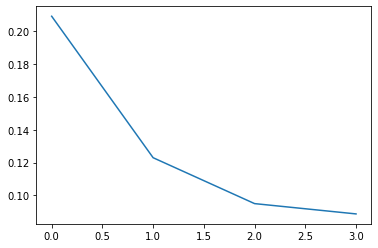

In [62]:
  print(X_train.shape)
  print(X_tests.shape)
  print(Y_train.shape) 
  print(Y_tests.shape)

  #n_components default = min(n_muentras , n_features)
  pca = PCA(n_components=4)

  pca.fit(X_train) 

  IPCA = IncrementalPCA(n_components=4 , batch_size=10) #reducimos los features a 3 
  IPCA.fit(X_train)

  plt.plot(range(len(pca.explained_variance_)) , pca.explained_variance_ratio_)
  plt.show() # podemos ver la importancia en el eje Y , y los componentes en el eje X

podemos ver que el componente 1 aporta mas del 20%
de impacto en la clasificacion , mientrs que la componente 3 no nos aporta casi nada 

aplicamos PCA a nuestro conjunto de datos 

y tambien comparamos PCA vs IPCA

In [63]:
  logistic = LogisticRegression(solver='lbfgs')

  data_train = pca.transform(X_train)
  data_tests = pca.transform(X_tests)

  logistic.fit(data_train , Y_train)

  print("score PCA: " , logistic.score(data_tests , Y_tests) )

  
  data_train = IPCA.transform(X_train)
  data_tests = IPCA.transform(X_tests)

  logistic.fit(data_train , Y_train)

  print("score IPCA: " , logistic.score(data_tests , Y_tests) )



score PCA:  0.8214285714285714
score IPCA:  0.8084415584415584


el rendimineto es casi el mismo EN ESTE CASO , 
IPCA es mas recomendable en el caso que no tengamos mucho 
poder de computo o estemos limitados de tiempo 